# Swift-Hohenberg Equation

The [Swift–Hohenberg equation](https://en.wikipedia.org/wiki/Swift%E2%80%93Hohenberg_equation) is a partial differential equation noted for its pattern-forming behaviour. It is defined as:

$$
\frac{\partial \phi}{\partial t} = \nu \nabla^2 \phi + r \phi (1 - \phi)
$$

## Solution in 1D

In [ ]:
from torchfsm.operator import Operator, Laplacian, ImplicitSource, HyperDiffusion

def SwiftHohenberg(r:float) -> Operator:
    return -HyperDiffusion()-2*Laplacian()+ImplicitSource(lambda phi:r*phi-phi+phi**2-phi**3)

swift_hohenberg = SwiftHohenberg(r=2)

In [15]:
import torch
from torchfsm.mesh import MeshGrid
from torchfsm.traj_recorder import AutoRecorder, IntervalController
from torchfsm.plot import plot_traj
from torchfsm.field import truncated_fourier_series
device='cuda' if torch.cuda.is_available() else 'cpu'
L=20.0*torch.pi; N=100; 

In [27]:
mesh=MeshGrid([(0,L,N)],device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=10.0/L,
    normalize_mode="-1_1", 
)
traj=swift_hohenberg.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.1,
    step=200,
    trajectory_recorder=AutoRecorder(),
)

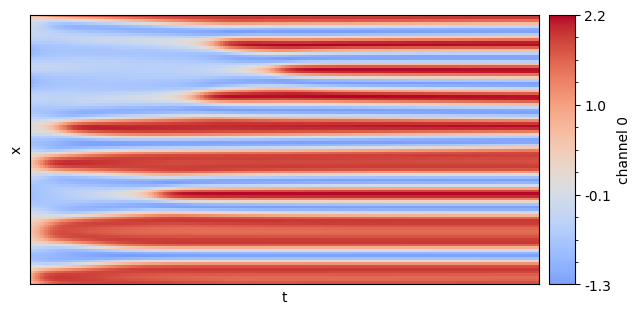

In [28]:
plot_traj(traj,animation=False)

## Solution in 2D

In [ ]:
mesh=MeshGrid([(0,L,N)]*2,device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=10.0/L,
    normalize_mode="-1_1", 
)
traj=swift_hohenberg.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.1,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [24]:
plot_traj(traj,animation=True)

## Solution in 3D

In [35]:
mesh=MeshGrid([(0,L,N)]*3,device=device)
x=mesh.bc_mesh_grid()
u_0=truncated_fourier_series(
    mesh=mesh,
    freq_threshold=10.0/L,
    normalize_mode="-1_1", 
)
traj=swift_hohenberg.integrate(
    u_0=u_0,
    mesh=mesh,
    dt=0.1,
    step=50,
    trajectory_recorder=AutoRecorder(),
)

In [38]:
plot_traj(traj,animation=True,)